# 1. Install and Import Dependencies

In [45]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image
from copy import deepcopy

# 2. Load Model

In [46]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/cc/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-5-29 Python-3.8.13 torch-1.11.0+cu102 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [47]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [48]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [49]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 291.7ms pre-process, 255.4ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


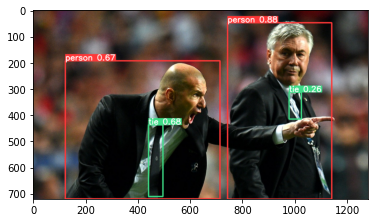

In [50]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [52]:
data_folder_path = '/home/cc/my_mounting_point/datasets'
dataset_folder_path = os.path.join(
    data_folder_path, 'ILSVRC/Data/DET/test'
)
classes_file_path = os.path.join(
    data_folder_path, 'imagenet_classes.txt'
)

image_names = os.listdir(dataset_folder_path)
image_names.sort()
with open(classes_file_path) as f:
    classes = [line.strip() for line in f.readlines()]

def image_loader(folder_path, image_name):
    image = Image.open(
        os.path.join(folder_path, image_name))
    # if there was a need to filter out only color images
    # if image.mode == 'RGB':
    #     pass
    return image
num_loaded_images = 3
images = {
    image_name: image_loader(
        dataset_folder_path, image_name) for image_name in image_names[
            :num_loaded_images]}

In [53]:
images

{'ILSVRC2017_test_00000001.JPEG': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x367>,
 'ILSVRC2017_test_00000002.JPEG': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>,
 'ILSVRC2017_test_00000003.JPEG': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>}

In [54]:
model_results = {}
for image_name, image in images.items():
    model_results[image_name] = model(image)

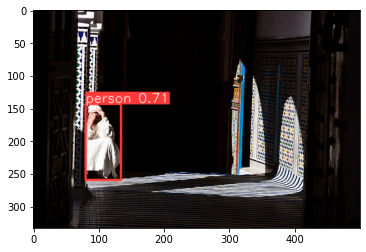

In [55]:
%matplotlib inline
image_num = 1
plt.imshow(np.squeeze(list(model_results.items())[2][image_num].render()))
plt.show()


In [56]:
def get_cropped(result):
    """
    crops selected objects for
    the subsequent nodes
    """
    result = result.crop()
    liscense_labels = ['car', 'truck']
    car_labels = ['car']
    person_labels = ['person']
    output_list = {'person': [], 'car': [], 'liscense': []}
    for obj in result:
        for label in liscense_labels:
            if label in obj['label']:
                output_list['liscense'].append(deepcopy(obj['im']))
                break
        for label in car_labels:
            if label in obj['label']:
                output_list['car'].append(deepcopy(obj['im']))
                break
        for label in person_labels:
            if label in obj['label']:
                output_list['person'].append(deepcopy(obj['im']))
                break
    return output_list

In [57]:
crop_results = {}
for image_name, result in model_results.items():
    crop_results[image_name] = get_cropped(result)

Saved 1 image to runs/detect/exp13
Saved results to runs/detect/exp13

Saved 1 image to runs/detect/exp14
Saved results to runs/detect/exp14

Saved 1 image to runs/detect/exp15
Saved results to runs/detect/exp15



In [58]:
crop_results

{'ILSVRC2017_test_00000001.JPEG': {'person': [], 'car': [], 'liscense': []},
 'ILSVRC2017_test_00000002.JPEG': {'person': [array([[[147, 161, 184],
           [144, 158, 181],
           [143, 157, 180],
           ...,
           [ 57,  52,  51],
           [ 57,  52,  49],
           [ 59,  52,  49]],
   
          [[144, 158, 186],
           [141, 158, 185],
           [141, 157, 186],
           ...,
           [ 57,  51,  52],
           [ 58,  53,  50],
           [ 60,  53,  50]],
   
          [[146, 161, 187],
           [144, 161, 187],
           [144, 161, 188],
           ...,
           [ 57,  51,  52],
           [ 57,  52,  49],
           [ 59,  52,  49]],
   
          ...,
   
          [[141, 160, 165],
           [121, 141, 146],
           [ 89, 113, 119],
           ...,
           [ 78, 100, 118],
           [ 74,  92, 109],
           [ 84, 100, 117]],
   
          [[133, 152, 155],
           [ 98, 118, 123],
           [ 60,  87,  91],
           ...,
     

In [64]:
list(crop_results.items())[2][1]['person'][0]

array([[[237, 234, 236],
        [253, 254, 255],
        [118, 118, 136],
        ...,
        [155, 155, 255],
        [ 56,  56, 255],
        [ 56,  56, 255]],

       [[238, 237, 239],
        [253, 252, 254],
        [ 19,  19,  33],
        ...,
        [105, 105, 255],
        [ 56,  56, 255],
        [ 56,  56, 255]],

       [[241, 233, 234],
        [255, 255, 252],
        [ 36,  38,  46],
        ...,
        [ 68,  68, 255],
        [ 56,  56, 255],
        [ 56,  56, 255]],

       ...,

       [[  2,   1,   3],
        [ 12,  17,  20],
        [ 18,  21,  29],
        ...,
        [194, 204, 198],
        [192, 199, 196],
        [198, 204, 203]],

       [[  0,   1,   2],
        [  9,  15,  20],
        [ 17,  20,  28],
        ...,
        [152, 139, 147],
        [137, 122, 130],
        [117, 103, 109]],

       [[  2,   0,   0],
        [ 13,  19,  26],
        [ 15,  22,  31],
        ...,
        [194, 195, 199],
        [198, 197, 201],
        [214, 214, 220]]

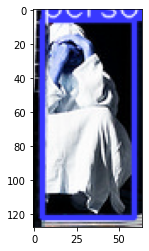

In [65]:
%matplotlib inline
image_num = 1
plt.imshow(list(crop_results.items())[2][image_num]['person'][0])
plt.show()

In [66]:
list(crop_results.items())[2][image_num]['person'][0].shape

(128, 64, 3)

In [83]:
import os
import numpy as np
import torch
from torchvision import models
from torchvision import transforms
%matplotlib inline
image_num = 1
plt.imshow()
plt.show()

def predict(X, features_names=None):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])
    print(f'input images: {X.shape}')
    plt.imshow(X)
    plt.show()
    X_trans = Image.fromarray(X.astype(np.uint8))
    X_trans = transform(X_trans)
    print(f'transformed images: {X_trans.shape}')
    plt.imshow(X_trans)
    plt.show()
    batch = torch.unsqueeze(X_trans, 0)
    resnet = models.resnet101(pretrained=True)
    resnet.eval()
    out = resnet(batch)
    percentages = torch.nn.functional.softmax(out, dim=1)[0] * 100
    percentages = percentages.detach().numpy()
    image_net_class = np.argmax(percentages)
    return image_net_class


TypeError: imshow() missing 1 required positional argument: 'X'

In [81]:
classes[np.argmax(predict(list(crop_results.items())[2][image_num]['person'][0]))]

input images: (128, 64, 3)
transformed images: torch.Size([3, 224, 224])


'tench'